# Define some URLS and execute some imports
ImageNet has a small API for mapping "WordNet IDs" (wnid) to various data points. It *doesnt* however have a search functionality

In [40]:
import requests
import random

API = {
    'allsynsets': "http://image-net.org/api/text/imagenet.synset.obtain_synset_list",
    'wordsfor': "http://image-net.org/api/text/wordnet.synset.getwords?wnid={}",
    'urlsfor': "http://image-net.org/api/text/imagenet.synset.geturls?wnid={}",
    'hyponymfor': "http://image-net.org/api/text/wordnet.structure.hyponym?wnid={}",
}

## Get all tracked wnids
Print one to confirm

In [41]:
# Fetch the list of synset IDs, content is a binary string - decode it before tokenizing on \n
synsets = requests.get(API['allsynsets']).content.decode().splitlines()

# Print one
random.choice(synsets)

'n04019696'

## Translate a wnid to its descriptors
Print to confirm

In [42]:
# Fetch the words for a given synset ID 
r = requests.get(API['wordsfor'].format(
    random.choice(synsets))
)

# Decode and split the result
words = r.content.decode().splitlines()
del r
words

['spirillum', 'spirilla']

## Get the image urls for a synset
Print the first few to confirm

In [43]:
r = requests.get(API['urlsfor'].format(random.choice(synsets)))
urls = r.content.decode().splitlines()
del r
urls[:5] + ["..."] # First 5 urls for 

['http://lh3.ggpht.com/_4Lxfju0hJ5M/Rqwq6ugk_yI/AAAAAAAAAUk/3QQO6-ubr-8/DSC00426.JPG',
 'http://farm3.static.flickr.com/2139/2093983257_33f42fb848.jpg%3Fv%3D0',
 'http://calphotos.berkeley.edu/imgs/128x192/8266_3261/0475/0019.jpeg',
 'http://pics.davesgarden.com/pics/kennedyh_1059347357_605_tn.jpg',
 'http://i.pbase.com/t5/14/98514/4/67338663.dkQRtceJ.jpg',
 '...']

## Get the children synsets for a particular parent
We can get one or all levels of children by adding '&full=1'. The first entry of the result is the parent synset

In [44]:
# Get the children one level deeper for a synset id
synset = random.choice(synsets)

# First entry is parent synset
r = requests.get(API['hyponymfor'].format(synset))
print(r.content.decode().splitlines())

# Get all lower level children
r = requests.get(API['hyponymfor'].format(synset) + "&full=1")
del synset
r.content.decode().splitlines()

['n02807731']


['n02807731']

# Keyword searching: not part of the imagenet API
* background: imagenet is based on nouns from wordnet
* idea: Use **nltk**'s corpus library to perform searching
* problem: Will have to filter to see if a noun from wordnet appears in imagenet
 * We can check if the offset is in the imagenet synset list

In [45]:
# Download the wordnet corpus using nltk for the next step
from nltk import download
download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mattj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Lookup a synset for a search term
Restricted to nouns

In [46]:
# Look up a keyword using wordnet - conveniently available in nltk
from nltk.corpus import wordnet as wn

for synset in wn.synsets('toucan', pos=wn.NOUN):
    print("n{}".format(synset.offset()))

n1843383


## Confirm that imagenet has a synset for the wordnet synset
Check if the wnid is in the synsets from earlier. *Note it must be padded to 8 digits*

In [47]:
# Does imagenet have an entry for a toucan query?
offset = wn.synset("toucan.n.01").offset()
"n{}".format(str(offset).zfill(8)) in synsets


True

## Download an image
More work needs to be done here, eg check the filetype from the url. it might be png?

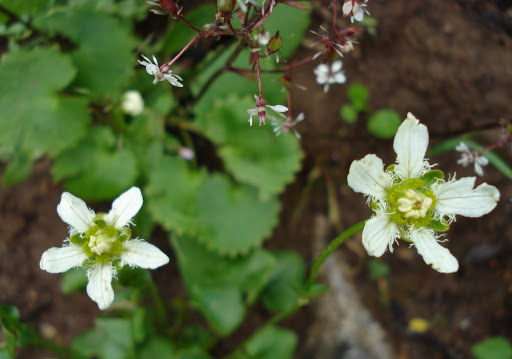

In [48]:
# Actually fetch an image
import shutil
from IPython.display import Image

response = requests.get(urls[0], stream=True)
with open('img.jpg', 'wb') as out_file:
    shutil.copyfileobj(response.raw, out_file)
del response

Image("img.jpg")

## Download Batch of Images
Grab a batch of images matching the wordnet synset, store in images folder

Image Count: 5


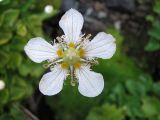

In [81]:
import os

numImages = int(input("Image Count: "))
for i in range(numImages):
    response = requests.get(urls[i], stream=True)
    with open('img' + str(i) + '.jpg', 'wb') as out_file:
        shutil.copyfileobj(response.raw, out_file)
    del response

# Need to move downloaded files to a folder
# shutil.move doesn't seem to work in Jupyter  

# Display a random image downloaded
randomNum = random.randint(0, numImages)
Image("img" + str(randomNum) + ".jpg")